<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.61
    Uninstalling yfinance-0.2.61:
      Successfully uninstalled yfinance-0.2.61


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-05-24 21:26:24
-------------------
qualified stocks: 94
with latest results: 32
still star stocks: 18
-------------------
Initial Investment:  1.14 C
CY Investment:  1.41 C
Reserve:  4.99 L
Current:  1.29 C
-------------------
Today PnL: 78.53 K (0.61%)
Current PnL: -17.20 L (-12.2%)
CY Booked + Current PnL: -12.91 L (-9.16%)
-------------------
Total profit:  3.60 L
Total loss:  -20.81 L
-------------------
Total Booked + Current PnL: 14.07 L (12.34%)
Total Booked PnL: 31.27 L (27.42%)
Curr Year Booked PnL: 4.29 L (3.34%)
Prev Year Booked PnL: 26.98 L (23.66%)
Est FTT:  2.08 C
Est FTT PnL: 79.18 L (61.6%)
-------------------
Est LTT:  2.69 C
Est LTT PnL: 1.40 C (109.27%)
Deployed:  1.14 C
Current:  1.29 C
CAGR/XIRR %: 8.52%


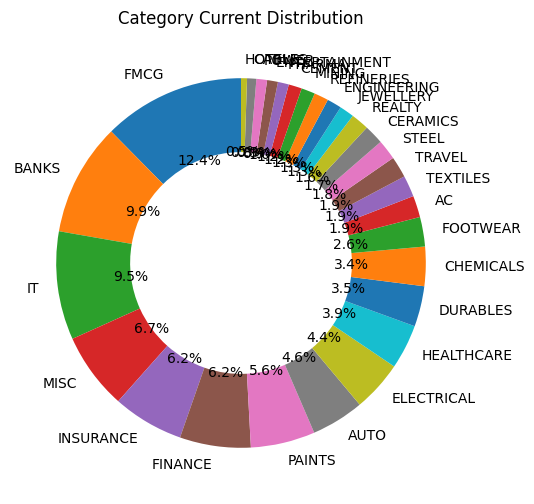

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Strategy','Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
68,SBILIFE,1496.49,1924.99,1.63,H-LC,86.17,100727.0,16924.0,7071.0,2.24,...,7.02,28.63,NaN,42.0,2.39,0.82,34.60,AR,ATH,INSURANCE
62,RELIANCE,1291.83,1526.00,4.45,X-LC,81.91,155521.0,14712.0,10809.0,1.23,...,6.95,18.13,67.0,17.0,1.36,1.26,22.80,XY25,NTT,REFINERIES
4,ADANIPORTS,1103.69,1583.00,-1.13,M-LC,91.49,99073.0,20711.0,13315.0,1.75,...,13.44,43.43,NaN,71.0,1.56,0.80,32.51,XY24,NTT,MISC
56,PIDILITIND,2504.06,3576.00,-17.89,X-LC,26.60,90951.0,15829.0,16326.0,1.24,...,17.95,42.81,10.0,11.0,0.97,0.74,14.06,X40,BTT,CHEMICALS
69,SBIN,760.30,863.00,-14.07,M-LC,29.26,209482.0,8002.0,19209.0,0.67,...,9.17,13.51,93.0,73.0,0.42,1.70,17.07,XY25,NTT,BANKS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,SAIL,130.64,228.00,90.28,M-MC,72.34,216834.0,-8128.0,175787.0,0.14,...,81.07,74.53,-18.0,167.0,-0.05,1.76,25.89,XY24,BTT,STEEL
60,RBLBANK,230.61,388.00,37.56,M-SC,79.79,213309.0,-20991.0,180907.0,0.99,...,84.81,68.25,-48.0,216.0,-0.12,1.73,40.47,XY24,NTT,BANKS
63,REPCOHOME,515.07,880.00,-56.78,H-SC,37.23,160275.0,-44723.0,189958.0,0.65,...,118.52,70.85,-44.0,125.0,-0.24,1.30,29.38,XY24,NTT,FINANCE
10,BANDHANBNK,214.25,400.00,-35.72,H-SC,15.96,191934.0,-56596.0,272066.0,-0.08,...,141.75,86.70,-29.0,117.0,-0.21,1.55,26.97,XY24,NTT,BANKS


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
0,5PAISA,564.75,810.00,146.39,H-SC,54.26,133079.0,-53853.0,135035.0,1.91,...,101.47,43.43,20.0,135.0,-0.40,1.08,27.31,X40N,BTT,FINANCE
2,ABB,5392.29,8953.12,-34.91,H-LC,60.64,172869.0,16493.0,86763.0,0.62,...,50.19,66.04,NaN,27.0,0.19,1.40,21.52,AR,ATH,ELECTRICAL
4,ADANIPORTS,1103.69,1583.00,-1.13,M-LC,91.49,99073.0,20711.0,13315.0,1.75,...,13.44,43.43,NaN,71.0,1.56,0.80,32.51,XY24,NTT,MISC
5,ALKYLAMINE,2347.98,4567.52,-15.28,X-SC,25.53,78909.0,-22054.0,117496.0,3.21,...,148.90,94.53,-59.0,60.0,-0.19,0.64,16.99,SR,ATH,CHEMICALS
6,ASIANPAINT,2961.56,4250.00,-20.77,X-LC,9.57,157454.0,-43932.0,131553.0,0.71,...,83.55,43.51,-18.0,8.0,-0.33,1.27,8.60,X40,BTT,PAINTS
11,BANKINDIA,113.49,190.00,-31.79,M-MC,31.91,133214.0,4062.0,83006.0,0.52,...,62.31,67.42,-12.0,155.0,0.05,1.08,29.56,XR,NTT,BANKS
12,BATAINDIA,1550.24,2096.00,-29.47,M-SC,52.13,105883.0,-22787.0,68083.0,1.17,...,64.30,35.20,-8.0,179.0,-0.33,0.86,8.03,X40,NTT,FOOTWEAR
13,BERGEPAINT,558.54,680.00,-20.84,H-MC,8.51,175903.0,-1154.0,39649.0,-2.03,...,22.54,21.75,-14.0,106.0,-0.03,1.42,25.83,XY24,NTT,PAINTS
14,BRITANNIA,4902.95,6446.05,10.14,X-LC,27.66,219460.0,23342.0,38384.0,0.90,...,17.49,31.47,239.0,13.0,0.61,1.78,19.92,XY25,ATH,FMCG
18,CERA,8421.60,10420.45,-19.81,X-SC,87.23,82752.0,-26729.0,52713.0,-0.58,...,63.70,23.73,-57.0,64.0,-0.51,0.67,25.25,X40N,ATH,CERAMICS


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
3,ACC,2579.05,3906.00,-33.74,M-MC,12.77,143036.0,-45235.0,142106.0,0.78,...,99.35,51.45,-37.0,153.0,-0.32,1.16,8.31,XY24,BTT,CEMENT
4,ADANIPORTS,1103.69,1583.00,-1.13,M-LC,91.49,99073.0,20711.0,13315.0,1.75,...,13.44,43.43,NaN,71.0,1.56,0.80,32.51,XY24,NTT,MISC
8,ATULAUTO,624.44,844.00,3602.70,M-SC,20.21,115380.0,-31988.0,83800.0,1.80,...,72.63,35.16,-49.0,210.0,-0.38,0.93,17.85,XY24,NTT,AUTO
9,AWL,342.88,485.00,-69.39,H-MC,4.26,165068.0,-52661.0,142899.0,0.95,...,86.57,41.45,-36.0,86.0,-0.37,1.34,10.27,XY24,NTT,FMCG
10,BANDHANBNK,214.25,400.00,-35.72,H-SC,15.96,191934.0,-56596.0,272066.0,-0.08,...,141.75,86.70,-29.0,117.0,-0.21,1.55,26.97,XY24,NTT,BANKS
13,BERGEPAINT,558.54,680.00,-20.84,H-MC,8.51,175903.0,-1154.0,39649.0,-2.03,...,22.54,21.75,-14.0,106.0,-0.03,1.42,25.83,XY24,NTT,PAINTS
14,BRITANNIA,4902.95,6446.05,10.14,X-LC,27.66,219460.0,23342.0,38384.0,0.90,...,17.49,31.47,239.0,13.0,0.61,1.78,19.92,XY25,ATH,FMCG
16,CAMPUS,294.86,393.00,-25.19,M-SC,82.98,155735.0,-12040.0,67885.0,0.58,...,43.59,33.28,-16.0,175.0,-0.18,1.26,20.57,XY24,NTT,FOOTWEAR
19,COALINDIA,406.65,512.15,6.54,L-LC,39.36,148555.0,-1906.0,40942.0,0.66,...,27.56,25.94,NaN,145.0,-0.05,1.20,13.35,XY25,ATH,MINING
21,COLPAL,2812.64,3808.06,1.21,X-MC,7.45,143805.0,-19328.0,77065.0,-0.31,...,53.59,35.39,-21.0,50.0,-0.25,1.16,5.48,XY25,ATH,FMCG


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
1,AARTIIND,487.04,919.00,36.09,M-SC,73.40,78373.0,-2963.0,75097.0,0.10,...,95.82,88.69,-8.0,202.0,-0.04,0.63,32.16,XR,NTT,CHEMICALS
2,ABB,5392.29,8953.12,-34.91,H-LC,60.64,172869.0,16493.0,86763.0,0.62,...,50.19,66.04,NaN,27.0,0.19,1.40,21.52,AR,ATH,ELECTRICAL
5,ALKYLAMINE,2347.98,4567.52,-15.28,X-SC,25.53,78909.0,-22054.0,117496.0,3.21,...,148.90,94.53,-59.0,60.0,-0.19,0.64,16.99,SR,ATH,CHEMICALS
7,ASIANTILES,75.41,137.00,5505.56,M-SC,70.21,61503.0,-32307.0,108922.0,0.02,...,177.10,81.67,-16.0,203.0,-0.30,0.50,19.10,XR,NTT,CERAMICS
11,BANKINDIA,113.49,190.00,-31.79,M-MC,31.91,133214.0,4062.0,83006.0,0.52,...,62.31,67.42,-12.0,155.0,0.05,1.08,29.56,XR,NTT,BANKS
15,BSOFT,628.85,844.81,-20.99,M-SC,69.15,74340.0,-35709.0,73500.0,0.81,...,98.87,34.34,-28.0,171.0,-0.49,0.60,22.39,XR,ATH,IT
17,CAMS,3643.00,5250.99,-3.29,H-SC,10.64,108766.0,6762.0,38264.0,0.05,...,35.18,44.14,261.0,111.0,0.18,0.88,23.95,XR,ATH,MISC
20,COFFEEDAY,59.14,80.00,-55.73,L-SC,95.74,64397.0,-49152.0,89203.0,-3.65,...,138.52,35.27,NaN,238.0,-0.55,0.52,57.61,XR,NTT,HOTELS
23,DEN,52.79,75.00,99.48,L-SC,45.74,55696.0,-28768.0,64307.0,-0.03,...,115.46,42.07,-21.0,235.0,-0.45,0.45,18.28,AR,NTT,ENTERTAINMENT
24,DLF,694.61,1031.70,-15.67,H-LC,92.55,194902.0,20555.0,64064.0,0.09,...,32.87,48.53,NaN,30.0,0.32,1.58,27.70,AR,ATH,REALTY


In [8]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,17.55
1,20,32.46
2,30,45.43


In [9]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,33.18
X40N,14.07
XY25,13.95
X40,13.79
AR,12.17
XR,10.47
X200,1.23
SR,1.16


In [10]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,21.81
M-SC,20.47
X-LC,16.07
H-MC,8.95
M-LC,7.95
H-LC,6.74
M-MC,5.75
X-SC,4.38
X-MC,4.30


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          8.88
          H-SC          8.67
X40       X-LC          6.96
XY25      X-LC          6.42
X40N      M-SC          5.20
          H-SC          5.05
XY24      M-LC          5.01
AR        H-LC          5.01
XY24      M-MC          3.91
XR        H-SC          3.17
XY24      H-MC          2.76
AR        H-SC          2.76
XR        M-SC          2.38
X40       M-SC          2.36
          H-MC          2.31
          H-SC          2.16
XY25      H-LC          1.73
          M-LC          1.70
X40N      X-MC          1.62
XY24      X-MC          1.52
          X-SC          1.50
AR        X-LC          1.46
X40N      X-SC          1.39
XR        M-LC          1.24
X200      X-LC          1.23
AR        H-MC          1.22
XY25      L-LC          1.20
          X-MC          1.16
          H-MC          1.12
XR        M-MC          1.08
          L-SC          1.02
XY24      L-SC          0.93
XR        X-SC          0.85
X40N      H-MC          0.81
AR        M-MC          0.76
XR        H-MC          0.73
SR        X-SC          0.64
XY25      M-SC          0.62
SR        M-SC          0.52
AR        M-SC          0.51
          L-SC          0.45
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,12.39,-1.53,34.26
BANKS,9.86,-15.09,68.00
IT,9.48,-19.94,86.43
MISC,6.71,-30.45,88.15
INSURANCE,6.22,2.20,26.96
FINANCE,6.21,-24.71,83.92
PAINTS,5.63,-18.29,53.29
AUTO,4.61,-9.60,57.48
ELECTRICAL,4.45,-5.52,59.20


In [13]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,66.29,8188132.0,-11.02,-902208.0,56.33,4612007.0


In [14]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,63.8,7880812.0,-6.73,-530217.0,47.33,3730032.0


In [15]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2873932.0
AR,1212878.0
X40N,1210248.0
XR,1158222.0
X40,724237.0
XY25,471389.0
SR,202151.0
X200,64546.0


In [16]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2321605.0
M-SC,2226979.0
X-LC,709009.0
M-MC,558729.0
H-MC,520906.0
X-SC,393446.0
M-LC,323029.0
L-SC,301327.0
X-MC,277314.0


In [17]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          958287.0
          H-SC          920007.0
AR        H-SC          558038.0
X40N      H-SC          507501.0
          M-SC          458660.0
XY24      M-MC          393703.0
X40       X-LC          393097.0
XR        M-SC          296368.0
          H-SC          282346.0
X40       M-SC          216143.0
AR        H-LC          213873.0
XY24      M-LC          196788.0
          H-MC          182548.0
XR        L-SC          153560.0
AR        X-LC          140614.0
XR        X-SC          121159.0
XY25      M-SC          119404.0
SR        X-SC          117496.0
XR        H-MC          114751.0
X40N      X-SC          114350.0
XY25      X-LC          110752.0
XR        M-LC          107032.0
X40N      X-MC          101551.0
XY24      X-MC           98698.0
AR        M-SC           93462.0
SR        M-SC           84655.0
XY24      L-SC           83460.0
XR        M-MC           83006.0
AR        M-MC           82020.0
XY25      X-MC           77065.0
          H-MC           73573.0
X200      X-LC           64546.0
AR        L-SC           64307.0
X40       H-MC           61284.0
AR        H-MC           60564.0
X40       H-SC           53713.0
XY25      L-LC           40942.0
XY24      X-SC           40441.0
XY25      H-LC           30444.0
X40N      H-MC           28186.0
XY25      M-LC           19209.0
Name: FTT Amt, dtype: float64

In [18]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,23
H-SC,21
X-LC,12
H-MC,8
M-LC,6
H-LC,5
M-MC,5
X-SC,5
L-SC,4
